# Regresión Lineal Polinómica

## 1)- Importamos todas las librerías que necesitaremos para nuestro proyecto

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2)- Ahora vamos a leer el csv y preparar los conjuntos de datos

In [4]:
data = pd.read_csv('Data_house_cleaned.csv')
data.head(5)

,price,bedrooms,floors,view,condition,sqft_above,sqft_basement,2,20,22,...,57,58,62,63,72,73,2.1,20.1,22.1,sqft_above_yeojohnson
0,313000.0,-0.441122,-0.022416,-0.309194,-0.667112,-0.565224,-0.672464,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443794
1,342000.0,-0.441122,-0.951388,-0.309194,0.809652,0.119171,-0.672464,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531898
2,420000.0,-0.441122,-0.951388,-0.309194,0.809652,-0.959621,1.482306,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.199296
3,550000.0,0.659291,-0.951388,-0.309194,0.809652,-0.797222,1.051352,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.871731
4,490000.0,-1.541536,-0.951388,-0.309194,-0.667112,-1.098820,-0.672464,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.498083


#### Ahora vamos a definir la variable dependiente

In [5]:
y = data['price']

#### En el caso del conjunto de datos independientes, vamos a hacer una separación entre las variables continuas y las variables dummy, además de que antes de hacer la división en los dos dataframe, vamos a colocar los datos de sqft_above_yeojohnson en sqft_above, ya que son los datos ya transformados necesarios para la regresión polinómica

In [6]:
data['sqft_above'] = data['sqft_above_yeojohnson']

In [10]:
X_dummy = data.iloc[:,7:-1]
X_dummy.head()

,2,20,22,44,45,46,47,49,51,52,...,55,57,58,62,63,72,73,2.1,20.1,22.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_continue = data.iloc[:,1:7]
X_continue.head()

,bedrooms,floors,view,condition,sqft_above,sqft_basement
0,-0.441122,-0.022416,-0.309194,-0.667112,-0.443794,-0.672464
1,-0.441122,-0.951388,-0.309194,0.809652,0.531898,-0.672464
2,-0.441122,-0.951388,-0.309194,0.809652,-1.199296,1.482306
3,0.659291,-0.951388,-0.309194,0.809652,-0.871731,1.051352
4,-1.541536,-0.951388,-0.309194,-0.667112,-1.498083,-0.672464


## 3)- Creación del modelo de Regresión polinómica y evaluación

#### Esta función entrenará a 4 modelos de regresión lineal con diferentes escalados polinómicos y obtendrá la puntuación de sus rendimientos devolviendo el porcentaje de error medio absoluto desde el exponente uno hasta el 5

In [47]:
def creationAndEvaluationModelPoly (Dummy, Continue,y):
    Dummy=pd.DataFrame(Dummy)
    Dummy.index = np.arange(0,len(Dummy))
    listResults = list()
    regresor = LinearRegression()
    for i in range(1,6):
        Poly = PolynomialFeatures(degree = i)
        X_conti = Poly.fit_transform(Continue)
        X_conti = pd.DataFrame(X_conti)
        X_conti.index = np.arange(0,len(Dummy))
        X = pd.concat([X_conti,Dummy],axis = 1)
        X.columns = X.columns.astype(str)
        X=X.astype(np.float32)
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
        regresor.fit(X_train, y_train)
        pred = regresor.predict(X_test)
        listResults.append((mean_absolute_error(y_test, pred)/y.mean())*100)
    return listResults

In [32]:
lista = creationAndEvaluationModelPoly(X_continue,X_dummy,y)

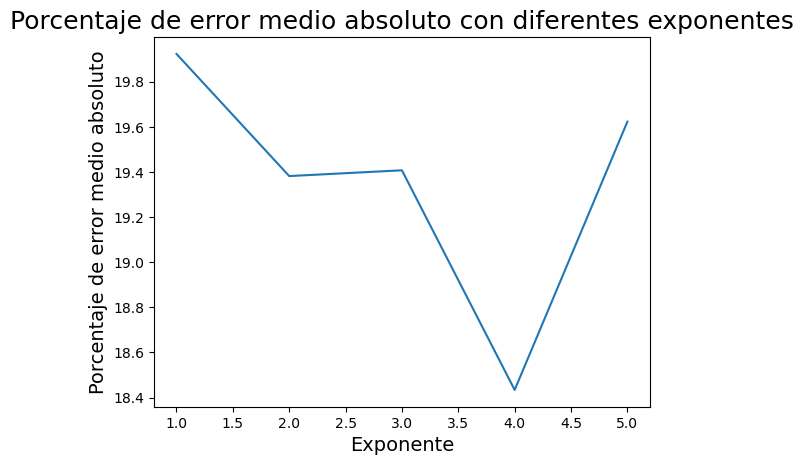

In [102]:
plt.plot(np.arange(1,6), lista)
plt.title('Porcentaje de error medio absoluto con diferentes exponentes', fontsize=18)
plt.xlabel('Exponente', fontsize=14)
plt.ylabel('Porcentaje de error medio absoluto', fontsize=14)
plt.show()

##### El que mejor resultado ha dado es el exponente de 4, por ende por ahora vamos a trabajar con un modelo de regresión que aplique una penalización a los coeficientes grandes, para que elimine el posible sobre ajuste que puede haber y de esta manera conseguir un modelo más preciso en sus mediciones. He decidido usar Ridge porque Laso fuerza a algunos elementos a tener coeficiente 0, cosa que no nos interesa, ya que en general todas nuestras columnas ya procesadas tienen una importancia en mayor o menor medida a la hora de la medición

## 3)- Creación del modelo con penalización Ridge y búsqueda de los mejores hiperparámetros

### La función de aquí abajo calculará la precisión del modelo con diferentes alphas de penalización para la regresión Ridge

##### "Parámetros":

##### X: es el conjunto de datos de variables independientes ya escalados

##### y: es el vector de la variable dependiente

##### maxAlpha: es el valor máximo no incluido en el rango de Alphas que se probaran

##### ups: es el valor de subida de Alpha en cada iteración

In [83]:
def creationAndEvaluationRidge (X,y,minAlpha,maxAlpha,ups):
    listResults = list()
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    for i in np.arange(minAlpha,maxAlpha,ups):
        regresor = Ridge(alpha=i)
        regresor.fit(X_train, y_train)
        pred = regresor.predict(X_test)
        listResults.append((mean_absolute_error(y_test, pred)/y.mean())*100)
    return listResults

#### Preparamos el conjunto de datos en escalado polinómico grado 4

In [37]:
Poly = PolynomialFeatures(degree = 4)

In [41]:
X_conti = Poly.fit_transform(X_continue)
X_conti = pd.DataFrame(X_conti)

In [42]:
X_dummy.index = np.arange(0,len(X_dummy))
X_conti.index = np.arange(0,len(X_dummy))

In [44]:
X = pd.concat([X_conti,X_dummy],axis = 1)

In [45]:
X.columns = X.columns.astype(str)
X=X.astype(np.float32)

#### Ejecutamos la función en un rango de 0 a 1,4 con saltos de 0.2

In [97]:
listaR = creationAndEvaluationRidge (X,y,1.8,10,0.1)

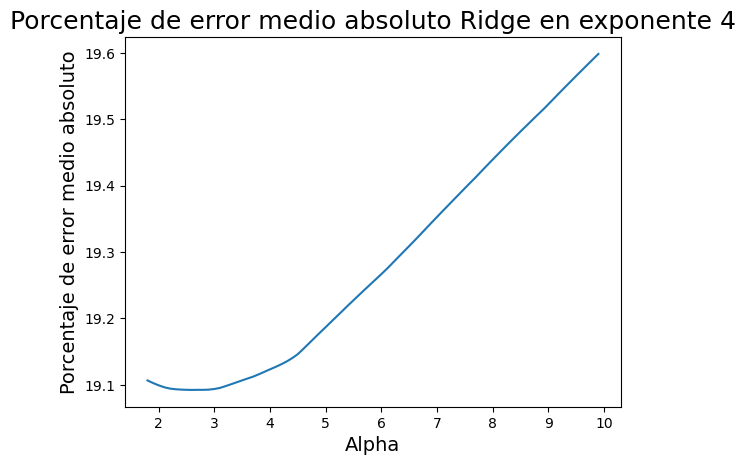

In [99]:
plt.plot(np.arange(1.8,10,0.1), listaR)
plt.title('Porcentaje de error medio absoluto Ridge en exponente 4', fontsize=18)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Porcentaje de error medio absoluto', fontsize=14)
plt.show()

##### Esta gráfica nos muestra que el erro medio absoluto no se ve mejorado con la regresión Ridge, esto es debido a que es probable que el modelo este suficientemente bien ajustado originalmente

#### El mejor resultado de la regresión lineal polinómica es del 81.5% de precisión